In [35]:
from qiskit import*
import qiskit
from qiskit.scheduler import measure
from qiskit.pulse.instructions import Play, Acquire
from qiskit import pulse
from qiskit.pulse import Drag, Gaussian, GaussianSquare


In [13]:
%matplotlib inline
import random
import math
import numpy as np
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

provider = IBMQ.get_provider(hub='ibm-q-education', group = 'rutgers-uni-Schn', project= 'vqe-research')
machine = provider.get_backend('ibmq_casablanca')
# from qiskit.test.mock import FakeLondon
# machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\isido\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-07 13:30:27,723: Credentials are already in use. The existing account in the session will be replaced.


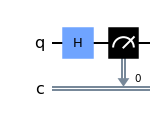

In [14]:
circ = QuantumCircuit(1,1)
circ.h(0)
# circ.cx(0,1)
circ.measure(0,0)
# circ.measure(1,1)
circ.draw(output = 'mpl')

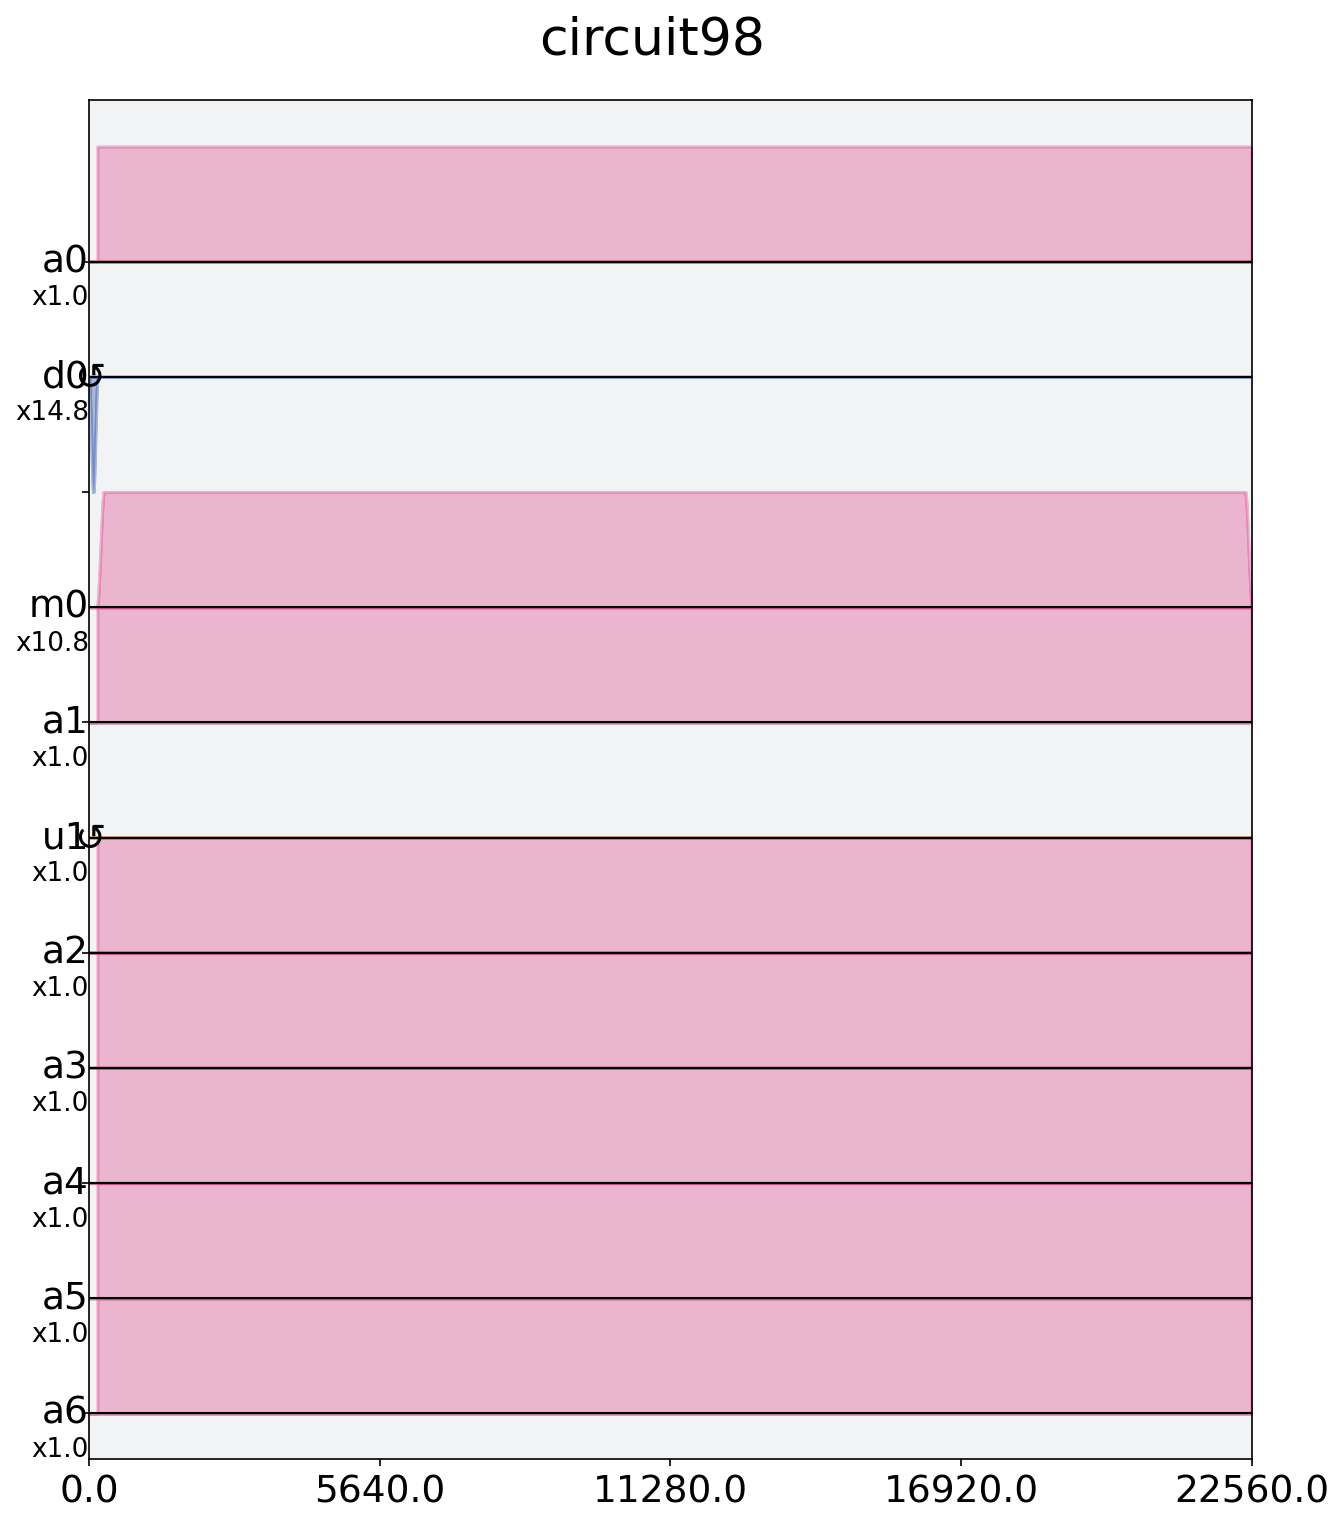

In [15]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

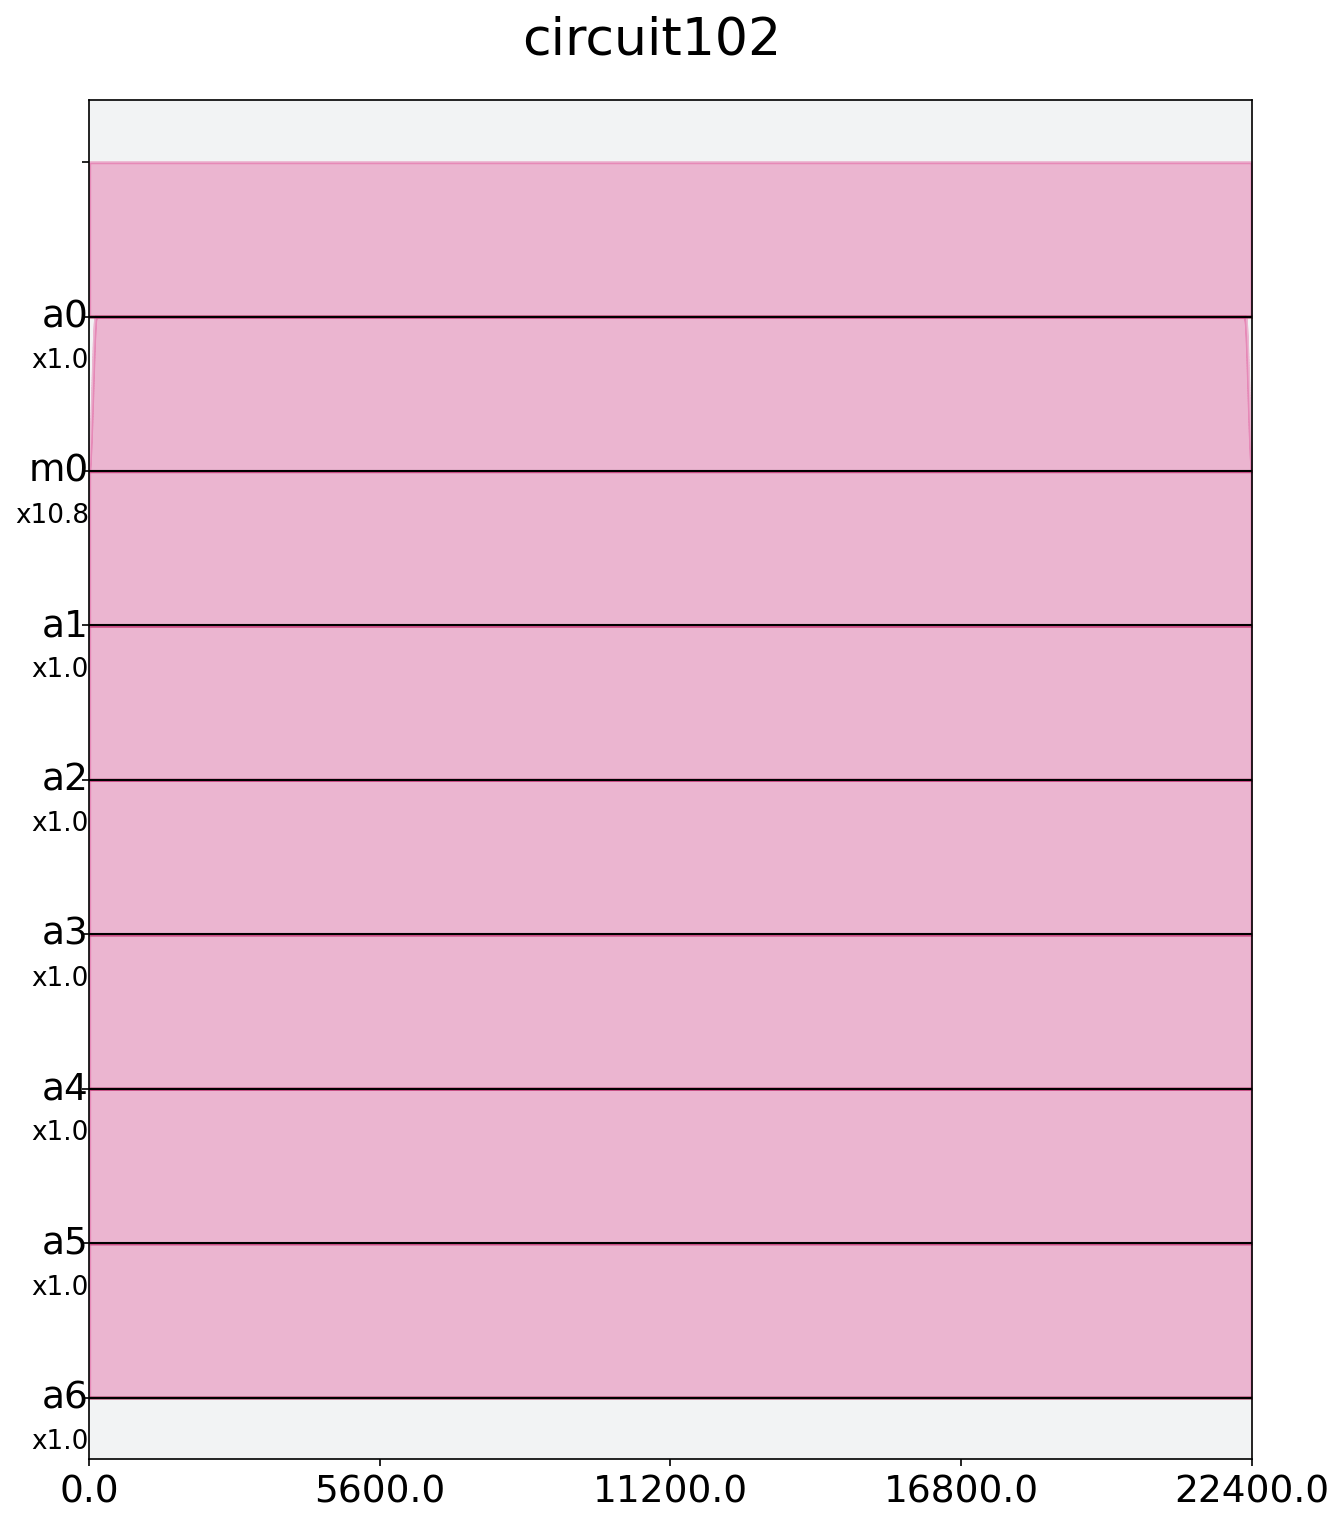

In [17]:
circ2 = QuantumCircuit(1,1)
circ2.h(0)
circ2.h(0)
circ2.h(0)
circ2.h(0)
# circ.cx(0,1)
circ2.measure(0,0)

circ_device2 = transpile(circ2, machine)
sched_circ2 = schedule(circ_device2, machine)
sched_circ2.draw()

In [18]:
experiments= [sched_circ, sched_circ2]

In [19]:
from qiskit.tools.monitor import job_monitor
job = execute(experiments, backend = machine, shots=8192)
job_monitor(job)
job.result()

Job Status: job is queued (1)     

KeyboardInterrupt: 

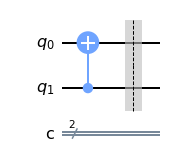

In [71]:
circ = QuantumCircuit(2,2)
#circ.x(1)
circ.cx(1,0)
circ.barrier(0,1)
# circ.cx(0,1)
# circ.barrier(0,1)
# circ.cx(0,1)
circ.draw(output = 'mpl')

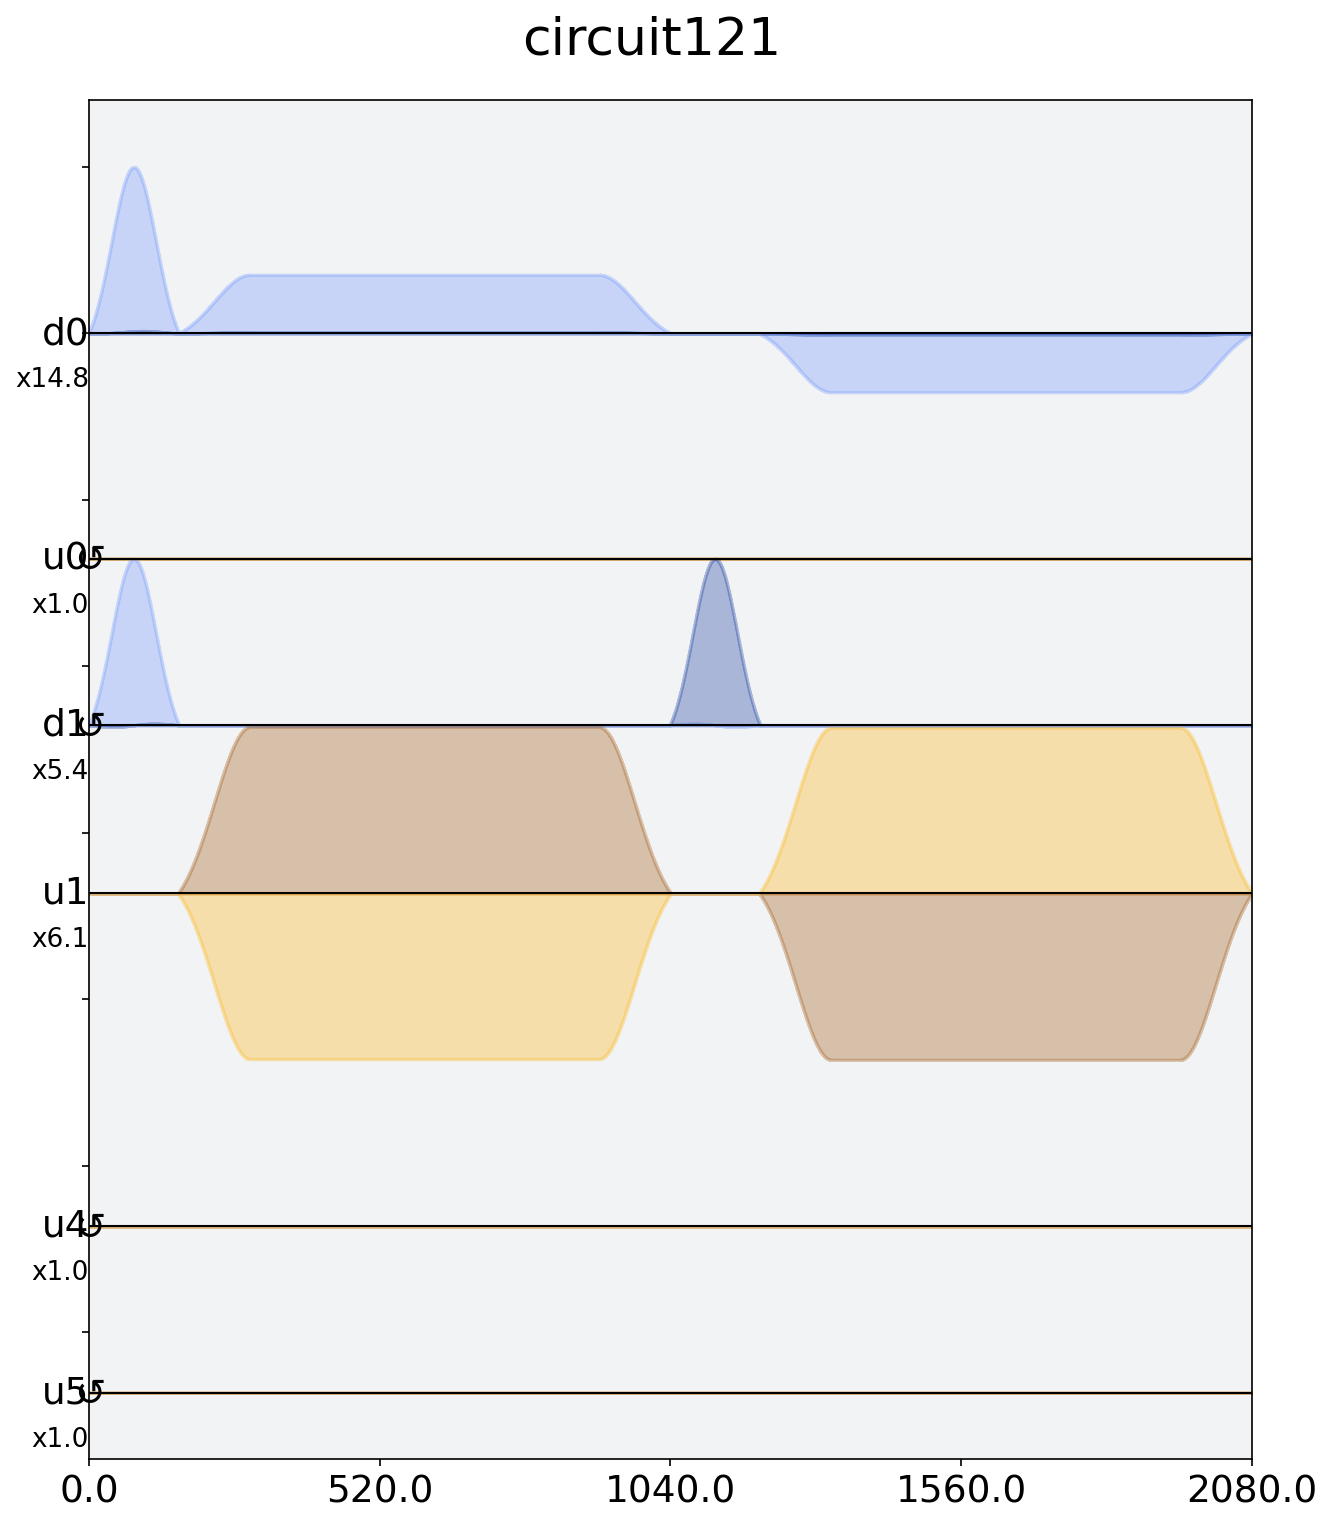

In [72]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

In [73]:
sched_circ

Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(1))), (0, ShiftPhase(1.5707963267948966, ControlChannel(0))), (0, ShiftPhase(1.5707963267948966, ControlChannel(4))), (0, ShiftPhase(1.5707963267948966, ControlChannel(5))), (0, Play(Drag(duration=160, amp=(0.06780083504981617+0.0009422341097256112j), sigma=40, beta=-0.3032675964310283), DriveChannel(0))), (0, Play(Drag(duration=160, amp=(-3.4170153659869855e-17-0.18601365271826648j), sigma=40, beta=-0.705999029403792), DriveChannel(1))), (160, Play(GaussianSquare(duration=880, amp=(0.02392943382445605+0.0005489291191742536j), sigma=64, width=624), DriveChannel(0))), (160, Play(GaussianSquare(duration=880, amp=(-0.16324114432009273+0.1639714763593352j), sigma=64, width=624), ControlChannel(1))), (1040, Play(Drag(duration=160, amp=(0.18601365271826648+0j), sigma=40, beta=-0.705999029403792), DriveChannel(1))), (1200, Play(GaussianSquare(duration=880, amp=(-0.02392943382445605-0.0005489291191742506j), sigma=64, width=624), DriveCha

In [74]:
instrucs = sched_circ.instructions

In [75]:
new_sched = qiskit.pulse.Schedule(name = "Schedule stretched")

In [76]:
for instruc_paren in instrucs:
        instruc = instruc_paren[1]
        print(instruc)

ShiftPhase(1.5707963267948966, DriveChannel(1))
ShiftPhase(1.5707963267948966, ControlChannel(0))
ShiftPhase(1.5707963267948966, ControlChannel(4))
ShiftPhase(1.5707963267948966, ControlChannel(5))
Play(Drag(duration=160, amp=(0.06780083504981617+0.0009422341097256112j), sigma=40, beta=-0.3032675964310283), DriveChannel(0))
Play(Drag(duration=160, amp=(-3.4170153659869855e-17-0.18601365271826648j), sigma=40, beta=-0.705999029403792), DriveChannel(1))
Play(GaussianSquare(duration=880, amp=(0.02392943382445605+0.0005489291191742536j), sigma=64, width=624), DriveChannel(0))
Play(GaussianSquare(duration=880, amp=(-0.16324114432009273+0.1639714763593352j), sigma=64, width=624), ControlChannel(1))
Play(Drag(duration=160, amp=(0.18601365271826648+0j), sigma=40, beta=-0.705999029403792), DriveChannel(1))
Play(GaussianSquare(duration=880, amp=(-0.02392943382445605-0.0005489291191742506j), sigma=64, width=624), DriveChannel(0))
Play(GaussianSquare(duration=880, amp=(0.1632411443200927-0.16397147

In [56]:
from qiskit import pulse
def stretchSchedule_singleQ(sched, factor, machine):
    # args:circuit in pulse form WITHOUT measurement, stretch factor
    #output: pulses stretched by thefactor
    
    instrucs = sched.instructions
    new_sched = qiskit.pulse.Schedule(name = "Schedule stretched by factor " + str(factor))
    
    #Only stretching the sample pulse, doing nothing to shiftphase, measurement,etc.
    
    for instruc_paren in instrucs:
        instruc = instruc_paren[1]
        #if drag/gaussian square ....ignore gaussian, only add drag
        if (isinstance(instruc, Play)):
            
            #print(instruc)
            
            if (isinstance(instruc.pulse, Drag)):
                drag = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = drag.parameters
                #print("Initial Param")
                #print(param)
                #print("final Param")
                #print('Duration' + str(factor*param['duration']))

                #stretching the drag pulse
                s_pulse = Drag(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'] ,param['beta'] )
                channel = instruc.channels[0]
                new_sched = new_sched.append(pulse.Play(s_pulse, channel))
                
            if (isinstance(instruc.pulse, GaussianSquare)):
                gauss = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = gauss.parameters
                print('Gaussian Parameters------------------------')
                print(param)

                #stretching the drag pulse
                s_pulse = GaussianSquare(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'],factor*param['width'])
                channel = instruc.channels[0]
                new_sched = new_sched.append(pulse.Play(s_pulse, channel))
        
        #if not acquire    
        elif ( not isinstance(instruc, Acquire)):
            new_sched+= instruc
    return new_sched

In [57]:
scheddy = stretchSchedule_singleQ(sched_circ, 3, machine)

Gaussian Parameters------------------------
{'duration': 880, 'amp': (0.02392943382445605+0.0005489291191742536j), 'sigma': 64, 'width': 624}
Gaussian Parameters------------------------
{'duration': 880, 'amp': (-0.16324114432009273+0.1639714763593352j), 'sigma': 64, 'width': 624}
Gaussian Parameters------------------------
{'duration': 880, 'amp': (-0.02392943382445605-0.0005489291191742506j), 'sigma': 64, 'width': 624}
Gaussian Parameters------------------------
{'duration': 880, 'amp': (0.1632411443200927-0.16397147635933523j), 'sigma': 64, 'width': 624}


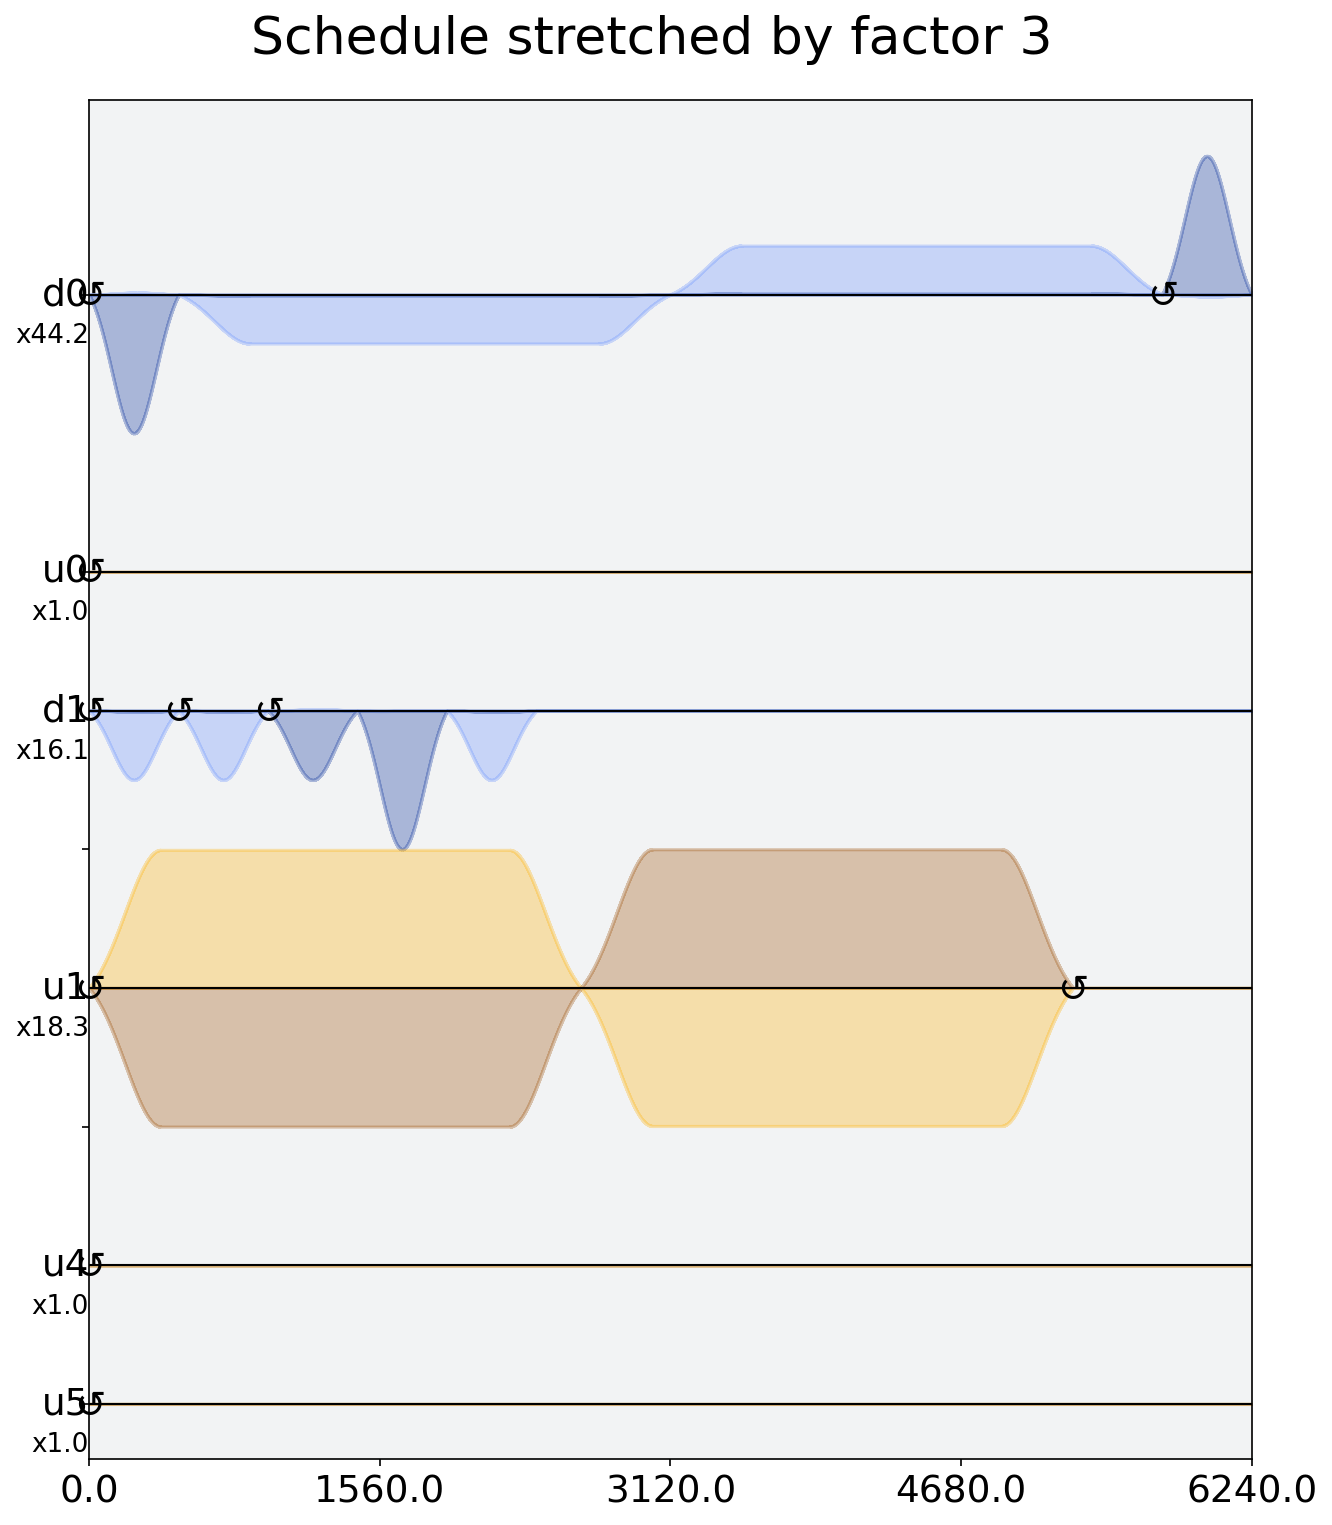

In [58]:
scheddy.draw()

In [48]:
scheddy

Schedule((0, ShiftPhase(-3.141592653589793, DriveChannel(0))), (0, ShiftPhase(-3.141592653589793, DriveChannel(1))), (0, ShiftPhase(-3.141592653589793, ControlChannel(0))), (0, ShiftPhase(-3.141592653589793, ControlChannel(0))), (0, ShiftPhase(-0.0, ControlChannel(0))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(0))), (0, ShiftPhase(-3.141592653589793, ControlChannel(1))), (0, ShiftPhase(-3.141592653589793, ControlChannel(4))), (0, ShiftPhase(-3.141592653589793, ControlChannel(4))), (0, ShiftPhase(-0.0, ControlChannel(4))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(4))), (0, ShiftPhase(-3.141592653589793, ControlChannel(5))), (0, ShiftPhase(-3.141592653589793, ControlChannel(5))), (0, ShiftPhase(-0.0, ControlChannel(5))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(5))), (0, Play(Drag(duration=480, amp=(-0.0003140780365752046+0.022600278349938722j), sigma=120, beta=-0.3032675964310283), DriveChannel(0))), (0, Play(Drag(duration=480, amp=(0.031018948097473156+0.0

In [49]:
scheddy.duration

6240